In [1]:
from inaFaceGender import GenderImage
import glob

In [2]:
gi = GenderImage(verbose=True)

2021-09-24 01:24:48.048841: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-24 01:24:48.055231: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-24 01:24:48.055512: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-24 01:24:48.055976: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

./media/1546923312_7cc94957e8_o.jpg


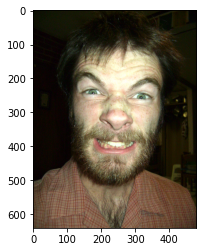

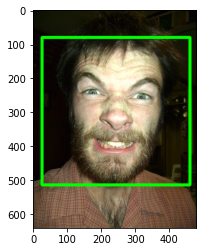

after rotation


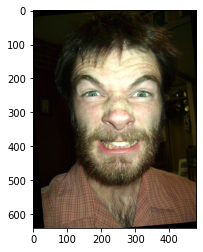

after crop


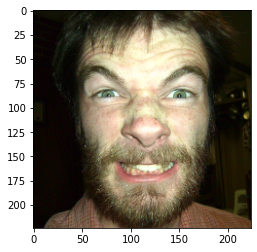

2021-09-24 01:24:49.245580: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-24 01:24:49.811041: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204
2021-09-24 01:24:50.287399: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-09-24 01:24:51.948328: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.15GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-09-24 01:24:51.948407: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.15GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were 

[(26, 80, 459, 513), 'm', 9.752994785822656, 0.9999391]



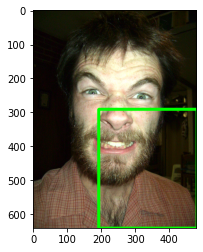

after rotation


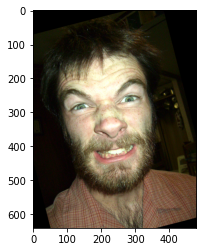

after crop


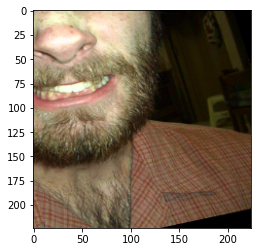

[(192, 291, 480, 640), 'm', 13.26065244370071, 0.9996722]

./media/Europa21_-_2.jpg


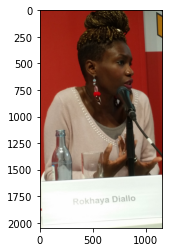

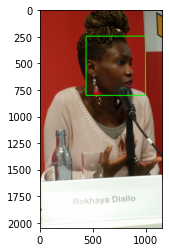

after rotation


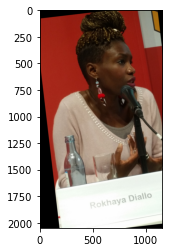

after crop


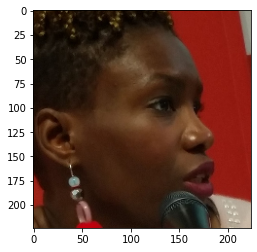

[(431, 245, 988, 802), 'f', -3.24866205721505, 0.99964356]

./media/20091020222328!KnuthAtOpenContentAlliance.jpg


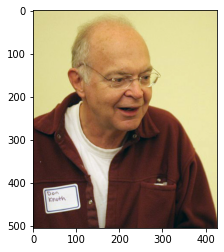

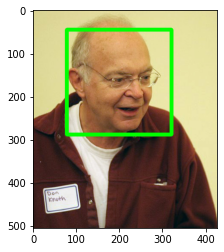

after rotation


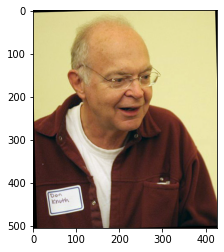

after crop


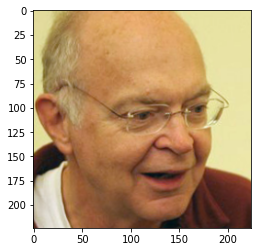

[(78, 45, 321, 288), 'm', 7.843016989318868, 0.99995565]



In [3]:
for e in glob.glob('./media/*.jpg'):
    print(e)
    gi(e)
    continue
    img = cv2.imread(e)
    img2 = img[:,:,::-1]
    plt.imshow(img2)
    plt.show()
    frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces_info = gv.detect_faces_from_image(frame)
    for bb, conf in faces_info:
        face_img, left_eye, right_eye = gv.align_and_crop_face(frame, bb, 224, 224)
        label, decision_value = gv._gender_from_face(face_img)
        bounding_box = element[0][0]
        detection_score = round(element[5], 3)
        bbox_length = bounding_box.bottom() - bounding_box.top()
        bb = bounding_box

        print([
            bounding_box, (bbox_length, bbox_length), label,
            decision_value, detection_score
        ])

        frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cv2.rectangle(frame, (bb.left(), bb.top()), (bb.right(), bb.bottom()), (0, 255, 0), 8)
        plt.imshow(frame)
        plt.show()